`Data cleaning & Feature Selection`

In [2]:
import pandas as pd

# Load dataset
file_path = "HIHD.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Display basic info and first few rows
print(df.info())  # Check data types and missing values
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ax_mean     349 non-null    float64
 1   ay_mean     349 non-null    float64
 2   az_mean     349 non-null    float64
 3   ax_std      349 non-null    float64
 4   ay_std      349 non-null    float64
 5   az_std      349 non-null    float64
 6   smv         349 non-null    float64
 7   heart_mean  349 non-null    float64
 8   heart_std   349 non-null    float64
 9   label       349 non-null    int64  
 10  subject     349 non-null    object 
 11  scenario    349 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 32.8+ KB
None
    ax_mean   ay_mean   az_mean    ax_std    ay_std    az_std       smv  \
0 -0.006456  0.015697 -0.005218  0.138422  0.177580  0.175156  0.126316   
1 -0.009429  0.014384  0.002540  0.302549  0.301892  0.457241  0.110524   
2 -0.073081 -0.031897  0.027

In [3]:
# Remove unnecessary columns
df_cleaned = df.drop(columns=["subject", "scenario"])

# Save cleaned data for further processing
df_cleaned.to_csv("cleaned_HIHD.csv", index=False)

# Display the cleaned dataset
print(df_cleaned.head())

    ax_mean   ay_mean   az_mean    ax_std    ay_std    az_std       smv  \
0 -0.006456  0.015697 -0.005218  0.138422  0.177580  0.175156  0.126316   
1 -0.009429  0.014384  0.002540  0.302549  0.301892  0.457241  0.110524   
2 -0.073081 -0.031897  0.027922  0.659727  0.777050  0.551743  0.185769   
3  0.015812 -0.026233 -0.030156  0.219743  0.244459  0.542286  0.131484   
4 -0.020766 -0.036805 -0.020855  0.253118  0.330738  0.310635  0.117544   

   heart_mean   heart_std  label  
0  291.212121  461.633513      1  
1  256.666667  443.499969      1  
2  280.152416  456.191348      1  
3  278.476940  455.337791      1  
4  447.486293  507.478566      1  


`Feature Selection`

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
# Load cleaned dataset
df = pd.read_csv("cleaned_HIHD.csv")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"]

In [6]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

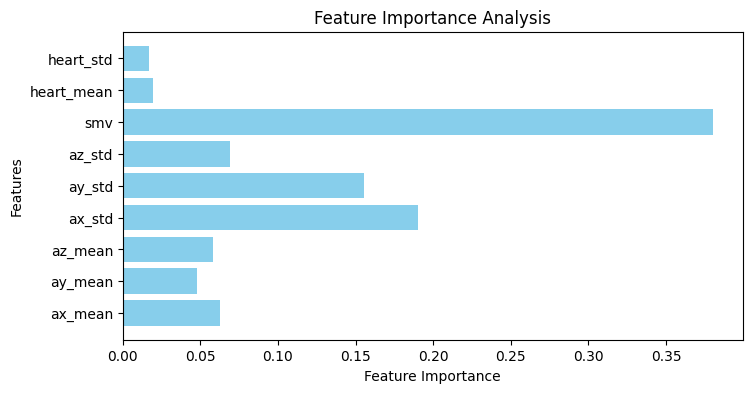

In [7]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()

`Data Preprocessing`

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("HIHD.csv")

In [9]:
# Select only important features
selected_features = ["smv", "ax_std", "ay_std", "az_std", "label"]
df = df[selected_features]

# Check for NaN values
print("Missing values:\n", df.isnull().sum())

Missing values:
 smv       0
ax_std    0
ay_std    0
az_std    0
label     0
dtype: int64


In [10]:
# Normalize the features (Standardization)
scaler = StandardScaler()
df[["smv", "ax_std", "ay_std", "az_std"]] = scaler.fit_transform(df[["smv", "ax_std", "ay_std", "az_std"]])

# Save processed dataset
df.to_csv("processed_dataset.csv", index=False)

print("✅ Data Preprocessing Completed! Processed dataset saved.")
print(df.head())

✅ Data Preprocessing Completed! Processed dataset saved.
        smv    ax_std    ay_std    az_std  label
0 -0.683243 -0.726707 -0.756092 -0.635504      1
1 -0.750229  0.290364 -0.150551  1.152470      1
2 -0.431049  2.503739  2.164024  1.751458      1
3 -0.661320 -0.222775 -0.430316  1.691521      1
4 -0.720451 -0.015954 -0.010037  0.223216      1


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Load the processed dataset
df = pd.read_csv("processed_dataset.csv")

# Split data into features & labels
X = df.drop(columns=["label"])
y = df["label"]

In [13]:
# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [14]:
# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("✅ Model Training Complete!")
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Model Training Complete!
🎯 Accuracy: 0.9429
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.82      0.93      0.88        15

    accuracy                           0.94        70
   macro avg       0.90      0.94      0.92        70
weighted avg       0.95      0.94      0.94        70



`Convert the Random Forest to a Decision Tree`

In [15]:
import joblib
from sklearn.tree import export_text

In [16]:
# Load trained Random Forest model
rf_model = joblib.load("fall_detection_model.pkl")

# Extract the best performing tree
best_tree = rf_model.estimators_[0]  # Pick the first tree

In [17]:
# Print the tree structure
tree_rules = export_text(best_tree, feature_names=["smv", "ax_std", "ay_std", "az_std"])
print(tree_rules)

|--- ax_std <= 0.29
|   |--- smv <= -0.76
|   |   |--- smv <= -0.93
|   |   |   |--- class: 0.0
|   |   |--- smv >  -0.93
|   |   |   |--- az_std <= -1.13
|   |   |   |   |--- class: 0.0
|   |   |   |--- az_std >  -1.13
|   |   |   |   |--- ay_std <= -0.98
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ay_std >  -0.98
|   |   |   |   |   |--- class: 1.0
|   |--- smv >  -0.76
|   |   |--- ay_std <= 1.04
|   |   |   |--- smv <= -0.71
|   |   |   |   |--- ay_std <= -0.77
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ay_std >  -0.77
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- smv >  -0.71
|   |   |   |   |--- class: 0.0
|   |   |--- ay_std >  1.04
|   |   |   |--- smv <= 0.65
|   |   |   |   |--- class: 1.0
|   |   |   |--- smv >  0.65
|   |   |   |   |--- class: 0.0
|--- ax_std >  0.29
|   |--- smv <= 0.12
|   |   |--- az_std <= 1.96
|   |   |   |--- ax_std <= 0.50
|   |   |   |   |--- ay_std <= -0.58
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- a

In [18]:
# Save the tree as a text file for reference
with open("decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

print("✅ Decision Tree Extracted & Saved!")

✅ Decision Tree Extracted & Saved!


In [ ]:
import math
def calculate_smv(accel):
    ax, ay, az = accel['x'], accel['y'], accel['z']
    return math.sqrt(ax**2 + ay**2 + az**2)